In [1]:
import numpy as np
import matplotlib.pylab as plt

In [2]:
def single_cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [3]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size



In [4]:
def value_cross_entropy_error(y, t): # if value is not one hot encoded
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [5]:
def numerical_diff(f, x):
    h = 1e-4 # dont use 1e-50 it cause floating point rounding error
    return (f(x + h) - f(x)) / h

In [6]:
def test_function(x):
    return 0.01* x ** 2 + 0.1 * x

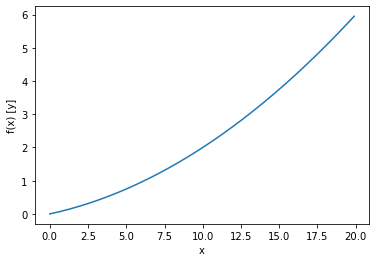

In [7]:
x = np.arange(0.0, 20.0, 0.1)
y = test_function(x)
plt.xlabel("x")
plt.ylabel("f(x) [y]")
plt.plot(x, y)
plt.show()

In [8]:
numerical_diff(test_function, 5)

0.20000099999917254

In [9]:
numerical_diff(test_function, 10)

0.3000009999976072

In [10]:
def partial_derivative(x):
    return x[0] ** 2 + x[1] ** 2

In [11]:
def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val 
        
    return grad

In [12]:
def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


In [13]:
numerical_gradient(partial_derivative, np.array([3.0, 4.0]))

array([6., 8.])

In [14]:
def gradient_descent(f, init_x, lr=0.01, step_num = 100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    
    return x

In [15]:
init_x = np.array([-3.0, 4.0])
gradient_descent(partial_derivative, init_x= init_x, lr = 1e-10, step_num=100)

array([-2.99999994,  3.99999992])

In [16]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 
    x = x - np.max(x)  # for numerical stability
    return np.exp(x) / np.sum(np.exp(x))

## define Network

In [17]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)

    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

In [18]:
net = simpleNet()
print(net.W)

[[ 1.04415083 -0.48210064  0.01620832]
 [ 2.11881323 -0.51833016 -0.71669818]]


## calculate loss 

In [19]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)
print(np.argmax(p))

t = np.array([0, 0, 1])
net.loss(x, t)

[ 2.5334224  -0.75575753 -0.63530337]
0


3.2450744018722233

## Calculate gradient of loss

In [20]:
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.55589304  0.02072615 -0.57661918]
 [ 0.83383955  0.03108922 -0.86492877]]
